# Knowledge Discovery in Databases (KDD)

# Step 1. Developing and Understanding Application:

The primary objective is to understand the patterns and trends within the Spotify dataset. This could be related to factors influencing the popularity of a track, characteristics of high-streamed songs, or any underlying structures in the music data.

Goals:

Identify features that contribute most to a track's popularity.
Understand the distribution and trends of different musical properties (like energy, loudness, etc.).
Segment tracks based on their audio features.

# Step 2. Creating Target Dataset

### Getting data

In [3]:
from google.colab import files
uploaded = files.upload()

Saving spotify.csv to spotify.csv


In [4]:
import pandas as pd

# Load the dataset
spotify_data = pd.read_csv('spotify.csv', encoding='ISO-8859-1')
# Display the first few rows
spotify_data.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# Step 3: Data Cleaning and Preprocessing:

### Data Cleaning

In [5]:
# Check for missing values
missing_values = spotify_data.isnull().sum()

# Check for duplicates
duplicate_rows = spotify_data.duplicated().sum()

missing_values, duplicate_rows


(track_name               0
 artist(s)_name           0
 artist_count             0
 released_year            0
 released_month           0
 released_day             0
 in_spotify_playlists     0
 in_spotify_charts        0
 streams                  0
 in_apple_playlists       0
 in_apple_charts          0
 in_deezer_playlists      0
 in_deezer_charts         0
 in_shazam_charts        50
 bpm                      0
 key                     95
 mode                     0
 danceability_%           0
 valence_%                0
 energy_%                 0
 acousticness_%           0
 instrumentalness_%       0
 liveness_%               0
 speechiness_%            0
 dtype: int64,
 0)

### Handling missing values

In [6]:
# Fill missing values for 'in_shazam_charts' with 0
spotify_data['in_shazam_charts'].fillna(0, inplace=True)

# Impute missing values for 'key' with the mode
key_mode = spotify_data['key'].mode()[0]
spotify_data['key'].fillna(key_mode, inplace=True)

# Verify if missing values are addressed
missing_values_after = spotify_data.isnull().sum()

missing_values_after


track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

### Data Standardization

In [8]:
# List of columns to be standardized
percentage_columns = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Convert percentages to a scale of 0 to 1
for col in percentage_columns:
    spotify_data[col] = spotify_data[col] / 100.0

# Display first few rows to verify the changes
spotify_data[percentage_columns].head()



,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0.0080,0.0089,0.0083,0.0031,0.0000,0.0008,0.0004
1,0.0071,0.0061,0.0074,0.0007,0.0000,0.0010,0.0004
2,0.0051,0.0032,0.0053,0.0017,0.0000,0.0031,0.0006
3,0.0055,0.0058,0.0072,0.0011,0.0000,0.0011,0.0015
4,0.0065,0.0023,0.0080,0.0014,0.0063,0.0011,0.0006


### Feature Engineering

In [9]:
# Check data types of relevant columns
print(spotify_data[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].dtypes)

# Convert columns to numeric if needed
spotify_data['in_spotify_playlists'] = pd.to_numeric(spotify_data['in_spotify_playlists'], errors='coerce')
spotify_data['in_apple_playlists'] = pd.to_numeric(spotify_data['in_apple_playlists'], errors='coerce')
spotify_data['in_deezer_playlists'] = pd.to_numeric(spotify_data['in_deezer_playlists'], errors='coerce')

# Handle missing values (replace NaN with 0 if appropriate)
spotify_data['in_spotify_playlists'].fillna(0, inplace=True)
spotify_data['in_apple_playlists'].fillna(0, inplace=True)
spotify_data['in_deezer_playlists'].fillna(0, inplace=True)

# Perform the arithmetic operation again
spotify_data['total_playlists'] = spotify_data['in_spotify_playlists'] + spotify_data['in_apple_playlists'] + spotify_data['in_deezer_playlists']


in_spotify_playlists     int64
in_apple_playlists       int64
in_deezer_playlists     object
dtype: object


In [10]:
# Aggregate total playlist presence
spotify_data['total_playlists'] = spotify_data['in_spotify_playlists'] + spotify_data['in_apple_playlists'] + spotify_data['in_deezer_playlists']

# Display the new feature
spotify_data['total_playlists'].head()


0     641.0
1    1580.0
2    1582.0
3    8099.0
4    3304.0
Name: total_playlists, dtype: float64

# Step 4: Data Transformation

### Data Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns
numerical_columns = spotify_data.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the numerical columns
spotify_data[numerical_columns] = scaler.fit_transform(spotify_data[numerical_columns])

# Display the scaled features
spotify_data[numerical_columns].head()


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,total_playlists
0,0.142857,1.000000,0.545455,0.433333,0.009874,1.000000,0.063988,0.956364,0.046201,0.172414,0.425532,0.780822,0.913978,0.840909,0.319588,0.000000,0.053191,0.032258,0.011438
1,0.000000,1.000000,0.181818,0.733333,0.027295,0.326531,0.071429,0.458182,0.059548,0.241379,0.191489,0.657534,0.612903,0.738636,0.072165,0.000000,0.074468,0.032258,0.029133
2,0.000000,1.000000,0.454545,0.966667,0.025838,0.768707,0.139881,0.752727,0.093429,0.241379,0.517730,0.383562,0.301075,0.500000,0.175258,0.000000,0.297872,0.064516,0.029171
3,0.000000,0.956989,0.636364,0.733333,0.148051,0.680272,0.172619,0.752727,0.128337,0.206897,0.744681,0.438356,0.580645,0.715909,0.113402,0.000000,0.085106,0.209677,0.151978
4,0.000000,1.000000,0.363636,0.566667,0.058676,0.340136,0.125000,0.483636,0.089322,0.258621,0.560284,0.575342,0.204301,0.806818,0.144330,0.692308,0.085106,0.064516,0.061620


### Data Encoding

In [14]:
print(spotify_data.columns)

# One-hot encode the 'key' and 'mode' columns
spotify_data_encoded = pd.get_dummies(spotify_data, columns=['key', 'mode'], drop_first=True)
# Assuming 'key' and 'mode' are original categorical columns
spotify_data_encoded = pd.get_dummies(spotify_data, columns=['key', 'mode'], prefix=['key', 'mode'])



Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'total_playlists'],
      dtype='object')


In [22]:
# Display a subset of the encoded features
encoded_columns = [col for col in spotify_data_encoded.columns if 'key' in col or 'mode' in col]
spotify_data_encoded[encoded_columns].head()


,key_A,key_A#,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,1



# Step 5. Choosing Suitable Data Mining Task

Code Snippet to Explore the 'popularity' Variable:

In [15]:
print(spotify_data.columns)

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'total_playlists'],
      dtype='object')


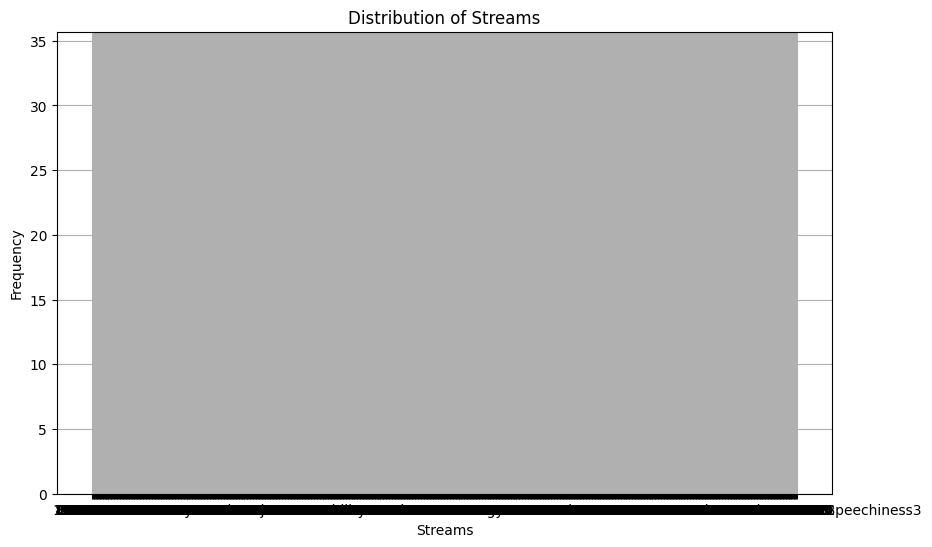

In [28]:
# Plotting the distribution of the 'streams' variable
plt.figure(figsize=(10, 6))
spotify_data_encoded['streams'].hist(bins=30)
plt.title('Distribution of Streams')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.show()


### EDA : Feature Distribution

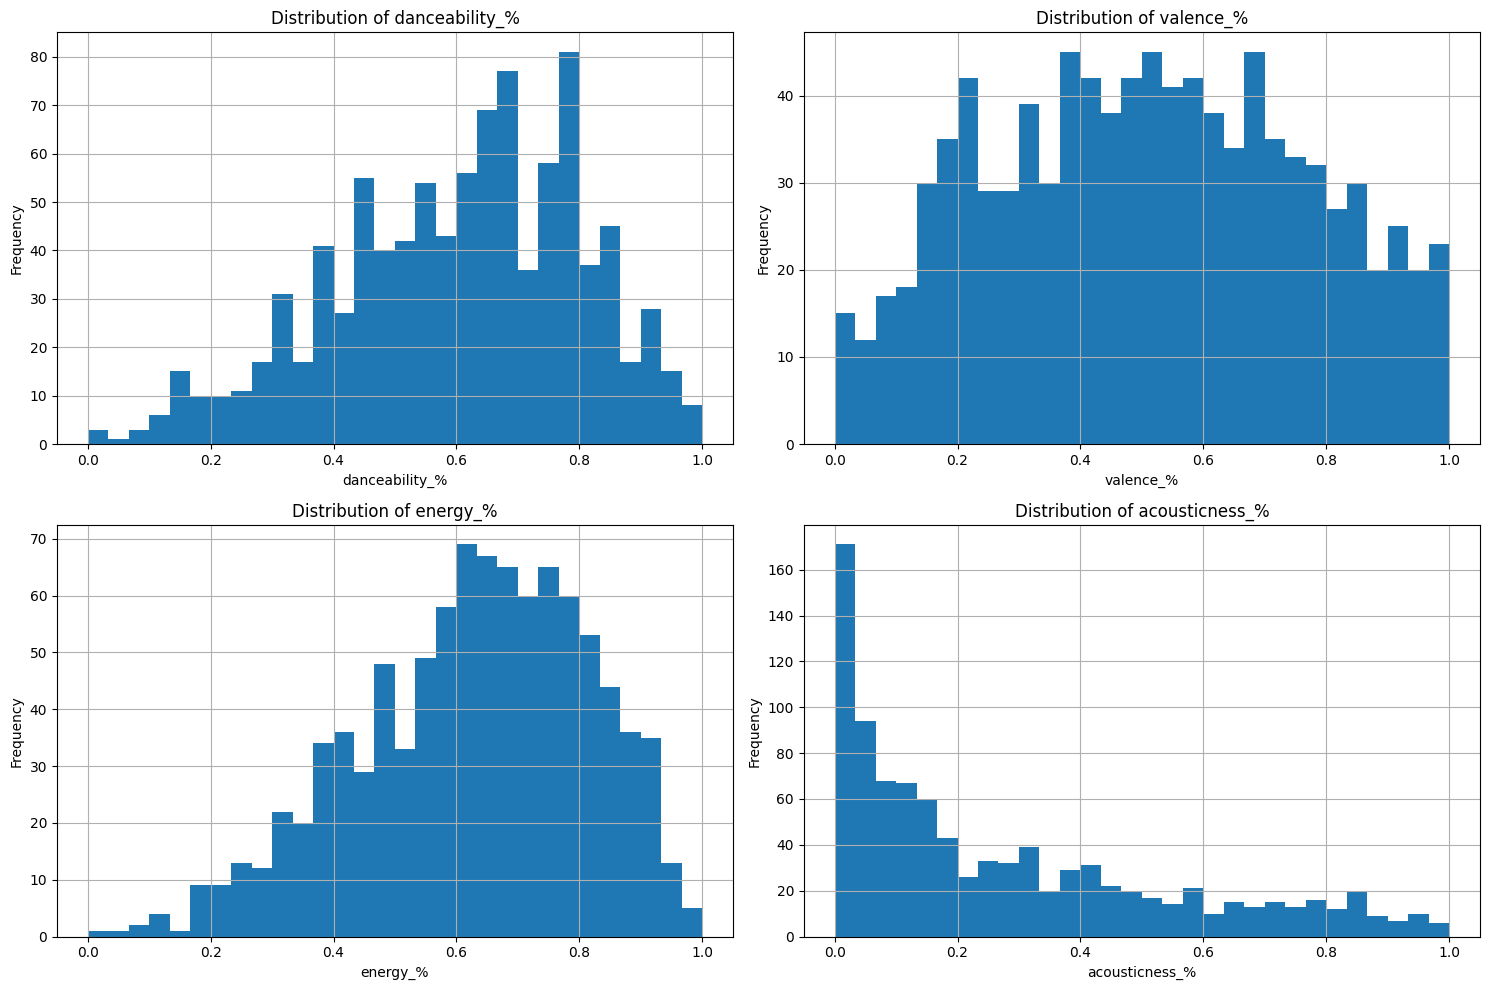

In [17]:
features_to_plot = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%']
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    spotify_data_encoded[feature].hist(bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Correlation Analysis

In [18]:

# Identify non-numeric values in the 'streams' column
non_numeric_streams = spotify_data_encoded[~spotify_data_encoded['streams'].apply(lambda x: isinstance(x, (int, float)))]

non_numeric_streams_values = non_numeric_streams['streams'].unique()
non_numeric_streams_values



array(['141381703', '133716286', '140003974', '800840817', '303236322',
       '183706234', '725980112', '58149378', '95217315', '553634067',
       '505671438', '58255150', '1316855716', '387570742', '2513188493',
       '1163093654', '496795686', '30546883', '335222234', '363369738',
       '86444842', '52135248', '1297026226', '200647221', '115364561',
       '78300654', '899183384', '61245289', '429829812', '127408954',
       '22581161', '52294266', '843957510', '999748277', '618990393',
       '123122413', '188933502', '1355959075', '786181836', '176553476',
       '354495408', '2808096550', '1109433169', '1047101291', '65156199',
       '570515054', '1085685420', '1647990401', '2565529693', '518745108',
       '107753850', '177740666', '153372011', '57876440', '1813673666',
       '3703895074', '256483385', '1214083358', '16011326', '812019557',
       '111947664', '156338624', '720434240', '357925728', '674072710',
       '1755214421', '404562836', '373199958', '14780425', '395

Handling non-numeric values in streams

In [19]:
# Import the necessary module and extract numeric values from the 'streams' column
import re

spotify_data_encoded['streams'] = spotify_data_encoded['streams'].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if re.search(r'\d+', str(x)) else x)

# Verify the changes
streams_sample = spotify_data_encoded['streams'].sample(5)
streams_sample



67     373199958
625    991336132
741    408843328
794     58687425
79      43857627
Name: streams, dtype: int64

In [37]:
correlation_matrix = spotify_data_encoded[features_to_plot + ['streams']].corr()
correlation_with_streams = correlation_matrix['streams'].drop('streams')


In [20]:
print(spotify_data_encoded.columns)


Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%', 'total_playlists',
       'key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E',
       'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor'],
      dtype='object')


# Step 6. Choosing suitable Mining Algorithm

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets and performing regression modeling
y = spotify_data_encoded['streams']
X = spotify_data_encoded.drop(columns=['track_name', 'artist(s)_name', 'streams'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify columns with strings containing commas
comma_columns = [col for col in X_train.columns if X_train[col].apply(lambda x: isinstance(x, str) and ',' in x).any()]

# Convert strings with commas to numbers in both train and test sets
for col in comma_columns:
    X_train[col] = X_train[col].apply(lambda x: float(str(x).replace(',', '')))
    X_test[col] = X_test[col].apply(lambda x: float(str(x).replace(',', '')))


# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(6.7393045046036984e+16, 0.782741893571955)

# Step 7. Employing Data Mining ALgorithm

In [28]:
# Extracting feature coefficients from the model
coefficients = model.coef_
features = X.columns
feature_coefficients = dict(zip(features, coefficients))

# Sorting the coefficients for better visualization
sorted_coefficients = dict(sorted(feature_coefficients.items(), key=lambda item: item[1], reverse=True))


In [29]:
# Extracting feature coefficients from the model
coefficients = model.coef_
features = X.columns
feature_coefficients = dict(zip(features, coefficients))

# Sorting the coefficients for better visualization
sorted_coefficients = dict(sorted(feature_coefficients.items(), key=lambda item: item[1], reverse=True))

sorted_coefficients


{'in_apple_playlists': 1390190937.941777,
 'total_playlists': 1053532921.74133,
 'in_spotify_playlists': 1030743228.7987417,
 'in_spotify_charts': 976319277.0622698,
 'in_deezer_playlists': 494169374.5858087,
 'released_year': 410434670.37591714,
 'acousticness_%': 114493831.9336739,
 'released_day': 98261511.86360338,
 'key_D#': 79679000.66792716,
 'key_A#': 74033808.06764127,
 'key_A': 38683638.61613807,
 'key_E': 24276185.345671806,
 'key_F': 16708063.90412448,
 'released_month': 13645984.723336004,
 'key_G#': 12332593.07156972,
 'danceability_%': 8675381.629534457,
 'mode_Major': 1042884.3123202946,
 'in_shazam_charts': -627554.9953156222,
 'mode_Minor': -1042884.3123289372,
 'key_D': -16225724.88838214,
 'liveness_%': -21198886.519196484,
 'bpm': -22870192.038546167,
 'key_C#': -36384998.2121842,
 'valence_%': -38644019.56221681,
 'key_B': -49316382.03154601,
 'key_G': -57178889.476870045,
 'energy_%': -73126629.06546515,
 'speechiness_%': -80453457.69730455,
 'key_F#': -86607295.


# Step 8. Interpreting Mined Patterns

In [30]:
# Extracting feature coefficients from the model
coefficients = model.coef_
features = X.columns
feature_coefficients = dict(zip(features, coefficients))

# Sorting the coefficients for better visualization
sorted_coefficients = dict(sorted(feature_coefficients.items(), key=lambda item: item[1], reverse=True))

sorted_coefficients


{'in_apple_playlists': 1390190937.941777,
 'total_playlists': 1053532921.74133,
 'in_spotify_playlists': 1030743228.7987417,
 'in_spotify_charts': 976319277.0622698,
 'in_deezer_playlists': 494169374.5858087,
 'released_year': 410434670.37591714,
 'acousticness_%': 114493831.9336739,
 'released_day': 98261511.86360338,
 'key_D#': 79679000.66792716,
 'key_A#': 74033808.06764127,
 'key_A': 38683638.61613807,
 'key_E': 24276185.345671806,
 'key_F': 16708063.90412448,
 'released_month': 13645984.723336004,
 'key_G#': 12332593.07156972,
 'danceability_%': 8675381.629534457,
 'mode_Major': 1042884.3123202946,
 'in_shazam_charts': -627554.9953156222,
 'mode_Minor': -1042884.3123289372,
 'key_D': -16225724.88838214,
 'liveness_%': -21198886.519196484,
 'bpm': -22870192.038546167,
 'key_C#': -36384998.2121842,
 'valence_%': -38644019.56221681,
 'key_B': -49316382.03154601,
 'key_G': -57178889.476870045,
 'energy_%': -73126629.06546515,
 'speechiness_%': -80453457.69730455,
 'key_F#': -86607295.

# Step 9. Using Discovered Knowledge

In [33]:
import joblib

# Save the model to a file
model_filename = '/spotify_regression_model.pkl'
joblib.dump(model, model_filename)



['/spotify_regression_model.pkl']

In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

# Load the trained model
model = joblib.load(model_filename)

@app.route('/predict_streams', methods=['POST'])
def predict_streams():
    # Get input features from the POST request
    data = request.json
    features = [data['danceability'], data['energy'], ...]  # and so on for all features

    # Predict the streams
    predicted_streams = model.predict([features])[0]

    # Return the prediction
    return jsonify({'predicted_streams': predicted_streams})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


Once the API is hosted (either locally or on a server), other applications can make POST requests to the /predict_streams endpoint with track features as input to get the predicted number of streams.

 for a real-world deployment, you'd also need error handling, logging, scaling considerations, and possibly a more robust server solution (e.g., using Gunicorn with Flask).